# Problem Statement

We will be trying to understand sentiment of tweets about the company Apple, By using the twitter for better understand public perception, Apple wants to monitor how people feel over time and how people receive new announcements.

Our challenge is to see if we can correctly classify tweets as being negative, positive, or neither about Apple.

Sentiment Mining - Apple
•	Apple is a computer company known for its laptops, phones, tablets, and personal media players
•	Large numbers of fans, large number of “haters”
•	Apple wants to monitor how people feel about them over time, and how people receive new announcements.

Problem Statement:
•	Can we correctly classify tweets as being negative, positive, or neither about Apple?



In [0]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

Load the csv file available in the working or specified directory

In [0]:
#import os
#os.chdir('C:\\GL Class\DSBA - Python\Machine Learning\Week 3')
Apple_tweets = pd.read_csv("Apple_tweets .csv")

In [0]:
Apple_tweets.head()

,Tweet,Avg
0,"I have to say, Apple has by far the best custo...",2.0
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2.0
2,LOVE U @APPLE,1.8
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1.8
4,.@apple has the best customer service. In and ...,1.8


## Basic Exploration in Text Mining

### Number of words

**To create a temporary function lambda can be used. These functions do not require a name like a def function, however the output is same as defining a permanent function**
**As these function are temporary, memory comsumption is less in comparison to permanent function. Also there are multiple ways to get a similar output**


In [0]:
## Let's get a word count without writing a lambda function



,Tweet,totalwords
0,"I have to say, Apple has by far the best custo...",19
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,10
2,LOVE U @APPLE,3
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",11
4,.@apple has the best customer service. In and ...,16


In [0]:
Apple_tweets['word_count'] = Apple_tweets['Tweet'].apply(lambda x: len(str(x).split(" ")))
Apple_tweets[['Tweet','word_count']].head()

,Tweet,word_count
0,"I have to say, Apple has by far the best custo...",19
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,10
2,LOVE U @APPLE,3
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",12
4,.@apple has the best customer service. In and ...,16


### Number of Characters- including spaces

,Tweet,char_count
0,"I have to say, Apple has by far the best custo...",101
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,60
2,LOVE U @APPLE,13
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",91
4,.@apple has the best customer service. In and ...,82


### Average Word Length

,Tweet,avg_word
0,"I have to say, Apple has by far the best custo...",4.368421
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,5.100000
2,LOVE U @APPLE,3.666667
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",7.272727
4,.@apple has the best customer service. In and ...,4.187500


In [0]:
#!pip install nltk

In [0]:
#import nltk
#nltk.download('stopwords')

### Number of stop Words

,Tweet,stopwords
0,"I have to say, Apple has by far the best custo...",6
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2
2,LOVE U @APPLE,0
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",2
4,.@apple has the best customer service. In and ...,8


### Number of special character

,Tweet,hastags
0,"I have to say, Apple has by far the best custo...",0
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,1
2,LOVE U @APPLE,0
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",2
4,.@apple has the best customer service. In and ...,0


### Number of numerics

In [0]:
Apple_tweets['numerics'] = Apple_tweets['Tweet'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
Apple_tweets[['Tweet','numerics']].head()

,Tweet,numerics
0,"I have to say, Apple has by far the best custo...",0
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,1
2,LOVE U @APPLE,0
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",0
4,.@apple has the best customer service. In and ...,0


### Number of Uppercase Words

,Tweet,upper
0,"I have to say, Apple has by far the best custo...",2
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,0
2,LOVE U @APPLE,3
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1
4,.@apple has the best customer service. In and ...,0


## Basic Pre-Processing

### Lower Case conversion

0    i have to say, apple has by far the best custo...
1    ios 7 is so fricking smooth & beautiful!! #tha...
2                                        love u @apple
3    thank you @apple, loving my new iphone 5s!!!!!...
4    .@apple has the best customer service. in and ...
Name: Tweet, dtype: object

### Removal of Punctuation

In [0]:
Apple_tweets['Tweet'] = Apple_tweets['Tweet'].str.replace('[^\w\s]','')
Apple_tweets['Tweet'].head()

0    i have to say apple has by far the best custom...
1    ios 7 is so fricking smooth  beautiful thanxap...
2                                         love u apple
3    thank you apple loving my new iphone 5s apple ...
4    apple has the best customer service in and out...
Name: Tweet, dtype: object

### Removal of StopWords

0    say apple far best customer care service ever ...
1     ios 7 fricking smooth beautiful thanxapple apple
2                                         love u apple
3    thank apple loving new iphone 5s apple iphone5...
4          apple best customer service new phone 10min
Name: Tweet, dtype: object

### Common Words Removal
1. **We will create a list of 10 frequently occuring words and then decide if we need to remove it or retain it.**
2. **Reason is that this file has tweets related to Apple.. So no point in keeping the word like Apple, unless we have tweets from other brands**

apple              1297
iphone              257
new                 113
5s                   91
ipad                 88
itunes               79
phone                75
ipod                 71
get                  60
ipodplayerpromo      60
dtype: int64

In [0]:
freq =['apple','get']

1. **As we are talking about multiple products hence iphone will be kept, similarly some tweets do relate to old products without mentioning the word old, hence even new would be kept in the tweets.**
2. **hence only apple and get would be removed**

In [0]:
Apple_tweets['Tweet'] = Apple_tweets['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
Apple_tweets['Tweet'].head()

0    say far best customer care service ever receiv...
1           ios 7 fricking smooth beautiful thanxapple
2                                               love u
3    thank loving new iphone 5s iphone5s pictwitter...
4                best customer service new phone 10min
Name: Tweet, dtype: object

### Rare Words Removal
**This is done as association of these less occurring words with the existing words could be a noise**

nuevo      1
wheel      1
logs       1
rekaly     1
tks        1
liking     1
bolsa      1
sale       1
afuera     1
minimum    1
dtype: int64

### Stemming -refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach

0    say far best custom care servic ever receiv ap...
1                   io 7 frick smooth beauti thanxappl
2                                               love u
3    thank love new iphon 5s iphone5 pictwittercomx...
4                   best custom servic new phone 10min
Name: Tweet, dtype: object

In [0]:
def Tweet(x):
    if x >= 0:
        return "Positive"
    else: return "Negative"


### Now to get the sentiments as positive and negative , convert the Avg column . If value is >= 0  then tweet is Positive, else tweet is Negative. This will make a dependent variable as a binary classifier

In [0]:
Apple_tweets["Sentiment"] = Apple_tweets["Avg"].apply(Tweet)

Apple_tweets.head()


,Tweet,Avg,totalwords,word_count,char_count,avg_word,stopwords,hastags,numerics,upper,Sentiment
0,say far best customer care service ever receiv...,2.0,19,19,101,4.368421,6,0,0,2,Positive
1,ios 7 fricking smooth beautiful thanxapple,2.0,10,10,60,5.100000,2,1,1,0,Positive
2,love u,1.8,3,3,13,3.666667,0,0,0,3,Positive
3,thank loving new iphone 5s iphone5s pictwitter...,1.8,11,12,91,7.272727,2,2,0,1,Positive
4,best customer service new phone 10min,1.8,16,16,82,4.187500,8,0,0,0,Positive


In [0]:
Apple_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 11 columns):
Tweet         1181 non-null object
Avg           1181 non-null float64
totalwords    1181 non-null int64
word_count    1181 non-null int64
char_count    1181 non-null int64
avg_word      1181 non-null float64
stopwords     1181 non-null int64
hastags       1181 non-null int64
numerics      1181 non-null int64
upper         1181 non-null int64
Sentiment     1181 non-null object
dtypes: float64(2), int64(7), object(2)
memory usage: 101.6+ KB


## Let's look at distribution of different sentiments

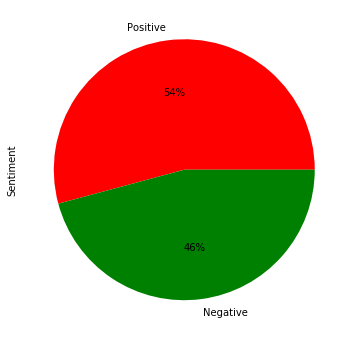

In [0]:
plt.figure(figsize=(8,6))
Apple_tweets.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red","green"])
plt.show()

In [0]:
Apple_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 11 columns):
Tweet         1181 non-null object
Avg           1181 non-null float64
totalwords    1181 non-null int64
word_count    1181 non-null int64
char_count    1181 non-null int64
avg_word      1181 non-null float64
stopwords     1181 non-null int64
hastags       1181 non-null int64
numerics      1181 non-null int64
upper         1181 non-null int64
Sentiment     1181 non-null object
dtypes: float64(2), int64(7), object(2)
memory usage: 101.6+ KB


In [0]:
processed_features = Apple_tweets.iloc[:, 0].values
labels = Apple_tweets.iloc[:, 10].values

In [0]:
processed_features

array(['say far best customer care service ever received appstore',
       'ios 7 fricking smooth beautiful thanxapple', 'love u', ...,
       'freaking cows freak', 'hate phone working im going freak',
       'agounalakis thats nasty nasty brat'], dtype=object)

In [0]:
labels

array(['Positive', 'Positive', 'Positive', ..., 'Negative', 'Negative',
       'Negative'], dtype=object)

## TfidfVectorizer

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8)
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [0]:
vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.8, max_features=2500,
                min_df=7, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

## Train-Test split

In [0]:
y_train

array(['Positive', 'Positive', 'Positive', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Negative',
       'Positive', 'Negative', 'Negative', 'Negative', 'Negative',
       'Positive', 'Negative', 'Positive', 'Negative', 'Negative',
       'Positive', 'Negative', 'Negative', 'Negative', 'Negative',
       'Positive', 'Negative', 'Positive', 'Positive', 'Positive',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Positive', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Negative',
       'Positive', 'Positive', 'Negative', 'Positive', 'Negative',
       'Negative', 'Negative', 'Negative', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Negative', 'Negative', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Negative', 'Positive', 'Positive', 'Negati

## Random Forest Model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

**Performance Matrix on train data set**

In [0]:
from sklearn import metrics
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9449152542372882
[[380  45]
 [  7 512]]
              precision    recall  f1-score   support

    Negative       0.98      0.89      0.94       425
    Positive       0.92      0.99      0.95       519

    accuracy                           0.94       944
   macro avg       0.95      0.94      0.94       944
weighted avg       0.95      0.94      0.94       944



**Performance Matrix on test data set**

0.7130801687763713
[[75 41]
 [27 94]]
              precision    recall  f1-score   support

    Negative       0.74      0.65      0.69       116
    Positive       0.70      0.78      0.73       121

    accuracy                           0.71       237
   macro avg       0.72      0.71      0.71       237
weighted avg       0.72      0.71      0.71       237



## Decision Tree Model

In [0]:
from sklearn import tree



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

**Performance Matrix on train data set**

In [0]:
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9449152542372882
[[386  39]
 [ 13 506]]
              precision    recall  f1-score   support

    Negative       0.97      0.91      0.94       425
    Positive       0.93      0.97      0.95       519

    accuracy                           0.94       944
   macro avg       0.95      0.94      0.94       944
weighted avg       0.95      0.94      0.94       944



**Performance Matrix on test data set**

0.6751054852320675
[[76 40]
 [37 84]]
              precision    recall  f1-score   support

    Negative       0.67      0.66      0.66       116
    Positive       0.68      0.69      0.69       121

    accuracy                           0.68       237
   macro avg       0.67      0.67      0.67       237
weighted avg       0.68      0.68      0.67       237



## Discriminant Analysis

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

**Performance Matrix on train data set**

In [0]:
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.809322033898305
[[303 122]
 [ 58 461]]
              precision    recall  f1-score   support

    Negative       0.84      0.71      0.77       425
    Positive       0.79      0.89      0.84       519

    accuracy                           0.81       944
   macro avg       0.82      0.80      0.80       944
weighted avg       0.81      0.81      0.81       944



**Performance Matrix on test data set**

0.70042194092827
[[76 40]
 [31 90]]
              precision    recall  f1-score   support

    Negative       0.71      0.66      0.68       116
    Positive       0.69      0.74      0.72       121

    accuracy                           0.70       237
   macro avg       0.70      0.70      0.70       237
weighted avg       0.70      0.70      0.70       237



**KNN** 

In [0]:
from sklearn.neighbors import KNeighborsClassifier



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.7182203389830508
[[215 210]
 [ 56 463]]
              precision    recall  f1-score   support

    Negative       0.79      0.51      0.62       425
    Positive       0.69      0.89      0.78       519

    accuracy                           0.72       944
   macro avg       0.74      0.70      0.70       944
weighted avg       0.74      0.72      0.71       944



In [0]:
## Performance Matrix on test data set


0.6075949367088608
[[49 67]
 [26 95]]
              precision    recall  f1-score   support

    Negative       0.65      0.42      0.51       116
    Positive       0.59      0.79      0.67       121

    accuracy                           0.61       237
   macro avg       0.62      0.60      0.59       237
weighted avg       0.62      0.61      0.59       237



## Conclusion

Out of the 4 models given above, considering the different between train and test dataset performance parameters, LDA has performed the best. As per the norm difference between the test and train matrix performance parameters can be within +/- 10% for the model to be valid. For a Negative class, for LDA, difference is within the norms. However for Positive class it is bit higher.


We can also look at KNN model outout as well wherein difference between train and test is within +/- 10% but the recall value for Negative sentiments is quite low.

In terms of sentiments, based on the organization objective, both positive and  negative metrics could be analyzed to define the marketing strategy e.g. based on positive sentiments organization can decide on what needs to be done for a specific product to increase the positive sentiment. Similarly based on the negative keywords organisation can decide what needs to be corrected to decrease the negative sentiment.







**Pl. note - Model building is an iterative process. Model performance both on the test and train dataset can be improved using feature engineering, feature extraction, hyper parameter tuning (including combination of various parameters).** 

**Model has to match the business objective and hence various permutation and combinations can be tried on to refine the model**